# Introducción al Webscraping con Selenium

In [45]:
# pip install selenium
# pip uninstall selenium -y

In [46]:
from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.support.select import Select

In [47]:
driver = webdriver.Chrome()

In [48]:
driver.get("https://www.metrocuadrado.com/")

In [49]:
from selenium.webdriver.common.by import By

# Encontramos la flecha para desplegar el menu

# Pararse NO sobre el input, sino sobre el DIV de arriba.
tipo_de_inmueble = driver.find_element(By.XPATH, '//*[@id="propertyTypes"]/div[1]/div[1]/div')
tipo_de_inmueble.click()

In [50]:
opciones_inmuebles = driver.find_elements(By.CLASS_NAME, 'custom-control-description')

[i.text for i in opciones_inmuebles]

['Apartaestudio',
 'Apartamentos',
 'Casas',
 'Oficinas',
 'Locales',
 'Bodegas',
 'Lotes',
 'Fincas',
 'Edificio de oficinas',
 'Consultorios',
 'Edificio de apartamentos']

In [53]:
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait 

# Encontramos la flecha para desplegar el menu
tipo_de_inmueble = driver.find_element(By.XPATH, '//*[@id="propertyTypes"]/div[1]/div[1]/div')
tipo_de_inmueble.click()

# Esperar hasta que las opciones sean visibles y luego capturarlas
opciones_inmuebles = WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, 'custom-control-description'))
)

[i.text for i in opciones_inmuebles]

['Apartaestudio',
 'Apartamentos',
 'Casas',
 'Oficinas',
 'Locales',
 'Bodegas',
 'Lotes',
 'Fincas',
 'Edificio de oficinas',
 'Consultorios',
 'Edificio de apartamentos']

In [54]:
# Seleccionar la opción que queremos. En este caso apartamentos
opciones_inmuebles[0].click()

In [78]:
# Encontramos el input text para rellenar
# Coger el XPATH del input
barra_texto = driver.find_element(By.XPATH, '//*[@id="formSearch"]/div/div[1]/div/div[3]/div/div/div/input')
barra_texto.send_keys("Chapinero ")

In [79]:
opciones_ubicacion = driver.find_elements(By.CLASS_NAME, 'react-autosuggest__suggestion')
[i.text for i in opciones_ubicacion]

['Chapinero (Bogotá D.C.)',
 'Chapinero (Bucaramanga)',
 'Chapinero (Cali)',
 'Chapinero (Facatativa)',
 'Chapinero (Manizales)',
 'Chapinero Norte (Bogotá D.C.)',
 'El Castillo Chapinero (Bogotá D.C.)',
 'Javeriana Chapinero (Bogotá D.C.)',
 'Chapinero Noroccidental (Bogotá D.C.)',
 'Colombia Chapinero (Bogotá D.C.)',
 'Marly Chapinero (Bogotá D.C.)',
 'Chapinero Alto (Bogotá D.C.)',
 'Chapinero Central (Bogotá D.C.)',
 'Chapinero Occidental (Bogotá D.C.)',
 'El Lago Chapinero (Bogotá D.C.)',
 'Granada Chapinero (Bogotá D.C.)',
 'Las Acacias Chapinero (Bogotá D.C.)',
 'Localidad De Chapinero (Bogotá D.C.)',
 'Castillo Chapinero Alto (Bogotá D.C.)',
 'Nueva Granada Chapinero (Bogotá D.C.)',
 'San Luis Chapinero (Bogotá D.C.)',
 'Chapinero Sur Occidental (Bogotá D.C.)',
 'Pardo Rubio Chapinero (Bogotá D.C.)',
 'La Salle Chapinero Alto (Bogotá D.C.)',
 'Quinta Camacho Chapinero (Bogotá D.C.)',
 'Siete De Agosto Chapinero (Bogotá D.C.)',
 'Pardo Rubio Chapinero Alto (Bogotá D.C.)',
 'La S

In [80]:
opciones_ubicacion[0].click()

In [81]:
# Copiar el XPATH del botón
boton_buscar = driver.find_element(By.XPATH, '//*[@id="btnSearch"]')
boton_buscar.click()

In [ ]:
# Selenium es muy canson.
# De pronto uno puede ahorrarse pasos de Selenium: https://www.metrocuadrado.com/apartaestudio/arriendo/bogota/chapinero/?search=form

In [82]:
source = driver.page_source

'<html lang="es"><head class="at-element-marker"><style type="text/css">@keyframes atNodeInserted946 {from {opacity:0.99} to {opacity:1}}\n@-moz-keyframes atNodeInserted946 {from {opacity:0.99} to {opacity:1}}\n@-webkit-keyframes atNodeInserted946 {from {opacity:0.99} to {opacity:1}}\n@-ms-keyframes atNodeInserted946 {from {opacity:0.99} to {opacity:1}}\n@-o-keyframes atNodeInserted946 {from {opacity:0.99} to {opacity:1}}\nundefined{\nanimation-duration:0.001s;animation-name:atNodeInserted946;\n-moz-animation-duration:0.001s;-moz-animation-name:atNodeInserted946;\n-webkit-animation-duration:0.001s;-webkit-animation-name:atNodeInserted946;\n-ms-animation-duration:0.001s;-ms-animation-name:atNodeInserted946;\n-o-animation-duration:0.001s;-o-animation-name:atNodeInserted946;\n}</style><style type="text/css">@keyframes atNodeInserted945 {from {opacity:0.99} to {opacity:1}}\n@-moz-keyframes atNodeInserted945 {from {opacity:0.99} to {opacity:1}}\n@-webkit-keyframes atNodeInserted945 {from {o
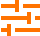
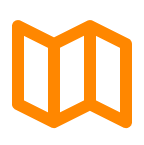
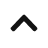
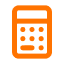
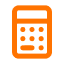
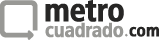
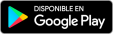
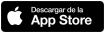
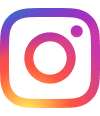

In [83]:
source

<html lang="es"><head class="at-element-marker"><style type="text/css">@keyframes atNodeInserted946 {from {opacity:0.99} to {opacity:1}}
@-moz-keyframes atNodeInserted946 {from {opacity:0.99} to {opacity:1}}
@-webkit-keyframes atNodeInserted946 {from {opacity:0.99} to {opacity:1}}
@-ms-keyframes atNodeInserted946 {from {opacity:0.99} to {opacity:1}}
@-o-keyframes atNodeInserted946 {from {opacity:0.99} to {opacity:1}}
undefined{
animation-duration:0.001s;animation-name:atNodeInserted946;
-moz-animation-duration:0.001s;-moz-animation-name:atNodeInserted946;
-webkit-animation-duration:0.001s;-webkit-animation-name:atNodeInserted946;
-ms-animation-duration:0.001s;-ms-animation-name:atNodeInserted946;
-o-animation-duration:0.001s;-o-animation-name:atNodeInserted946;
}</style><style type="text/css">@keyframes atNodeInserted945 {from {opacity:0.99} to {opacity:1}}
@-moz-keyframes atNodeInserted945 {from {opacity:0.99} to {opacity:1}}
@-webkit-keyframes atNodeInserted945 {from {opacity:0.99} t
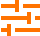
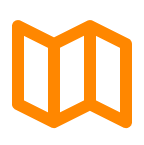
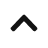
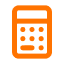
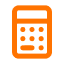
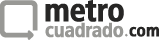
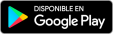
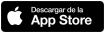
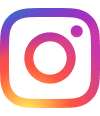

In [84]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(source)
soup

[<a data-campaign="24061200-15__metrocuadrado-AR-Billboard-RDM-resultados_mt2_mth_bbrd_hm_consid_Desktop" data-creative="mt2-AR-RDM_billboard_2x2" data-id="mth-pushdown-metro" href="https://www.metrocuadrado.com/landings/proyectos-frente-al-mar-santa-marta/?utm_source=mathilde&amp;utm_medium=banner&amp;utm_campaign=bld-nal-tfc-mth-arconstrucciones-zonal&amp;utm_content=billboard-home-desktop" id="mth-metro-cuadrado" name="mth-creative" onclick="mthSendClick(this); mthClick(this);" target="_blank"> <!-- Pushdown plegada --> <img alt="Pushdown plegada" class="mth-img-fluid" id="mth-img-pushdown" src="https://ftp.mathilde-ads.com/138-7ea5b6e3d0a983b9ccb9f1e4daadac76.webp" width="100%"/> <!-- Fin pushdown plegada --> </a>,
 <a data-campaign="24061200-15__metrocuadrado-AR-Billboard-RDM-resultados_mt2_mth_bbrd_hm_consid_Desktop" data-creative="mt2-AR-RDM_billboard_2x2" data-id="mth-pushdown-metro" href="https://www.metrocuadrado.com/landings/proyectos-frente-al-mar-santa-marta/?utm_source=ma
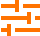
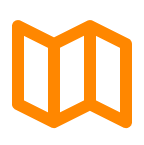
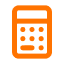
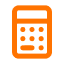
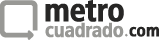
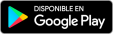
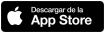
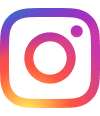

In [85]:
hipervinculos = soup.find_all("a")
hipervinculos

In [86]:
hrefs = [i.get("href") for i in hipervinculos if i.get("href")]
hrefs

['https://www.metrocuadrado.com/landings/proyectos-frente-al-mar-santa-marta/?utm_source=mathilde&utm_medium=banner&utm_campaign=bld-nal-tfc-mth-arconstrucciones-zonal&utm_content=billboard-home-desktop',
 'https://www.metrocuadrado.com/landings/proyectos-frente-al-mar-santa-marta/?utm_source=mathilde&utm_medium=banner&utm_campaign=bld-nal-tfc-mth-arconstrucciones-zonal&utm_content=billboard-home-desktop',
 '/',
 '#',
 '#',
 '/noticias/',
 '/noticias/economia/',
 '/noticias/decoracion/',
 '/noticias/arquitectura/',
 '/noticias/entretenimiento/',
 '/noticias/actualidad/',
 '/noticias/tendencias/',
 '#',
 'https://personal.metrocuadrado.com/simulador-credito-vivienda',
 '/noticias/herramientas/precios-m2/',
 'https://personal.metrocuadrado.com/busqueda-asistida',
 '/publicar-inmuebles/solicitud-inmuebles/',
 '/publicar-inmuebles/consignment/firststep/',
 '/precio-sugerido/paso-1',
 '/noticias/herramientas/guia-de-arriendo/',
 '/noticias/herramientas/guia-de-propiedad-horizontal/',
 '/not

In [87]:
proyectos = [i for i in hrefs if "/inmueble/arriendo-" in i]
proyectos

['/inmueble/arriendo-apartamento-bogota-sucre-1-habitaciones-1-banos/4278-M5345709',
 '/inmueble/arriendo-apartamento-bogota-sucre-1-habitaciones-1-banos/4278-M5345709',
 '/inmueble/arriendo-apartamento-bogota-sucre-1-habitaciones-1-banos/4278-M5345743',
 '/inmueble/arriendo-apartamento-bogota-sucre-1-habitaciones-1-banos/4278-M5345743',
 '/inmueble/arriendo-apartaestudio-bogota-emaus-1-habitaciones-1-banos-1-garajes/2363-M5346315',
 '/inmueble/arriendo-apartaestudio-bogota-emaus-1-habitaciones-1-banos-1-garajes/2363-M5346315',
 '/inmueble/arriendo-apartamento-bogota-pardo-rubio-1-habitaciones-2-banos-1-garajes/11013-M5350588',
 '/inmueble/arriendo-apartamento-bogota-pardo-rubio-1-habitaciones-2-banos-1-garajes/11013-M5350588',
 '/inmueble/arriendo-apartaestudio-bogota-bosque-calderon-1-habitaciones-1-banos-1-garajes/3422-M5348440',
 '/inmueble/arriendo-apartaestudio-bogota-bosque-calderon-1-habitaciones-1-banos-1-garajes/3422-M5348440',
 '/inmueble/arriendo-apartamento-bogota-chapiner

In [90]:
import requests

print('https://www.metrocuadrado.com/' + proyectos[0])
r = requests.get('https://www.metrocuadrado.com' + proyectos[0])
r.status_code

https://www.metrocuadrado.com//inmueble/arriendo-apartamento-bogota-sucre-1-habitaciones-1-banos/4278-M5345709


200

<!DOCTYPE html>
<html lang="es"><head><meta content="width=device-width,minimum-scale=1,initial-scale=1" name="viewport"/><meta charset="utf-8"/><link href="/_detail/style.min.css" rel="stylesheet"/><link href="/_detail/favicon.ico" rel="icon" type="image/x-icon"/><link href="/_detail/favicon.ico" rel="shortcut icon" type="image/x-icon"/><script async="" src="https://tags.tiqcdn.com/utag/adl/proptech/prod/utag.js" type="text/javascript"></script><script src="https://tags.tiqcdn.com/utag/adl/proptech/prod/utag.sync.js"></script><title>Arriendo de Apartamento en Chapinero central - Bogotá D.C. - 4278-M5345709</title><meta content="index,follow" name="robots"/><meta content="index,follow" name="googlebot"/><meta content="Apartamento en arriendo en Chapinero central, Bogotá D.C., 1 habitaciones, 1 baños, Estrato 3, al mejor precio, vea las fotos. 4278-M5345709" name="description"/><meta content="summary_large_image" name="twitter:card"/><meta content="@metrocuadrado" name="twitter:site"/><
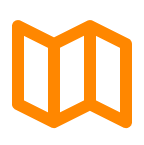
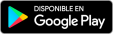
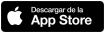
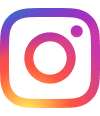

In [92]:
BeautifulSoup(r.content)

In [96]:
# pip install selenium-wire

In [97]:
from seleniumwire import webdriver

driver2 = webdriver.Chrome()
driver2.get("https://www.metrocuadrado.com" + proyectos[0])

In [113]:
# Se saca manualmente de Network de el request que trae el json con la información
link = 'https://www.metrocuadrado.com/rest-property-related/related/realestate?realEstateCode=4278-M5345709&companyId=3744&used=true'

In [114]:
requests_necesario = [i for i in driver2.requests if i.url == link][0]
requests_necesario

Request(method='GET', url='https://www.metrocuadrado.com/rest-property-related/related/realestate?realEstateCode=4278-M5345709&companyId=3744&used=true', headers=[('sec-ch-ua-platform', '"macOS"'), ('x-requested-with', 'XMLHttpRequest'), ('user-agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'), ('accept', 'application/json, text/plain, */*'), ('sec-ch-ua', '"Chromium";v="130", "Google Chrome";v="130", "Not?A_Brand";v="99"'), ('x-api-key', 'P1MfFHfQMOtL16Zpg36NcntJYCLFm8FqFfudnavl'), ('sec-ch-ua-mobile', '?0'), ('sec-fetch-site', 'same-origin'), ('sec-fetch-mode', 'cors'), ('sec-fetch-dest', 'empty'), ('referer', 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-sucre-1-habitaciones-1-banos/4278-M5345709'), ('accept-encoding', 'gzip, deflate, br, zstd'), ('accept-language', 'en-US,en;q=0.9'), ('priority', 'u=1, i'), ('cookie', 'utag_main__sn=1; utag_main__se=1%3Bexp-session; utag_main__ss=1%

In [115]:
header_necesario = dict(zip(requests_necesario.headers.keys(), requests_necesario.headers.values()))

In [116]:
r = requests.get(link, headers = header_necesario)
r.status_code

200

In [118]:
diccionario_resultante = r.json()
diccionario_resultante 

{'properties': [{'imageGallery': None,
   'contactPhone': None,
   'whatsapp': None,
   'title': 'Apartamento en Venta, LOS ROSALES, Bogotá D.C.',
   'link': '/inmueble/venta-apartamento-bogota-los-rosales-4-habitaciones-5-banos-4-garajes/4278-M5345795',
   'imageLink': 'https://multimedia.metrocuadrado.com/4278-M5345795/4278-M5345795_1_p.jpg',
   'whatsappMessage': None,
   'badge': None,
   'midinmueble': '4278-M5345795',
   'mtipoinmueble': {'id': '1', 'nombre': 'Apartamento'},
   'mtiponegocio': 'venta',
   'mvalorventa': 6495000000,
   'mvalorarriendo': None,
   'marea': 723.4,
   'mnrocuartos': '4',
   'mnrobanos': '5',
   'mnrogarajes': '4',
   'mciudad': {'id': '1', 'nombre': 'Bogotá D.C.'},
   'mzona': {'id': '1', 'nombre': 'Norte'},
   'mbarrio': 'LOS ROSALES',
   'mnombrecomunbarrio': 'Los Rosales',
   'data': {'mprimerafotoinmueble': '4278-M5345795_1',
    'murldetalle': '/inmueble/venta-apartamento-bogota-los-rosales-4-habitaciones-5-banos-4-garajes/4278-M5345795'},
   'mn

In [121]:
diccionario_resultante["properties"][0]['mtiponegocio']
diccionario_resultante["properties"][0]['mvalorventa']
diccionario_resultante["properties"][0]['marea']

6495000000

In [209]:
driver.quit()